# **1. Install pycaret**

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 99.1 MB/s eta 0:

# **2. Check the pycaret version**

In [ ]:
import pycaret
print(pycaret.__version__)

3.0.4


# **3. Get the dataset from github**

In [ ]:
import pandas as pd
dataset_url = 'https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/Lecture2_Assignments/Assignment2/dataset/loan_approval_dataset_binary_classification.csv'
dataset = pd.read_csv(dataset_url)

# **4. Scan the dataset**

In [ ]:
print("(Rows, Columns) in the dataset : ", dataset.shape, "\n\n")
dataset.head()

(Rows, Columns) in the dataset :  (4269, 13) 




,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# **5. Divide the data**

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data = data.reset_index(drop=True)

print("Data for modeling : ", data.shape)
print("Unseen data for predictions : ", data_unseen.shape)


Data for modeling :  (4056, 13)
Unseen data for predictions :  (213, 13)


In [ ]:
data.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1499,1,Not Graduate,No,2900000,7400000,10,874,400000,1200000,10100000,3300000,Approved
1,2450,5,Graduate,Yes,5200000,12700000,16,718,11700000,100000,18100000,7200000,Approved
2,2017,4,Not Graduate,No,5800000,14200000,20,535,10200000,4000000,21100000,3400000,Rejected
3,2444,4,Not Graduate,Yes,6700000,24700000,6,498,12900000,700000,18800000,8400000,Rejected
4,2961,1,Not Graduate,Yes,1000000,2100000,8,793,2900000,1300000,2200000,1400000,Approved


In [ ]:
data_unseen.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
1,14,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,Approved
2,19,2,Graduate,No,2700000,10300000,10,736,1000000,0,6200000,3300000,Approved
3,32,2,Graduate,No,5700000,12000000,6,363,3600000,7400000,21700000,4300000,Rejected
4,58,5,Graduate,Yes,9300000,30500000,18,841,19300000,10300000,34600000,8700000,Approved


# **6. Setup pycaret**

In [ ]:
from pycaret.classification import *

exp_loan_data = setup(data = data, target = ' loan_status', session_id=333, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,333
1,Target,loan_status
2,Target type,Binary
3,Target mapping,"Approved: 0, Rejected: 1"
4,Original data shape,"(4056, 13)"
5,Transformed data shape,"(4056, 13)"
6,Transformed train set shape,"(2839, 13)"
7,Transformed test set shape,"(1217, 13)"
8,Ordinal features,2
9,Numeric features,10


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

#**7. Compare all the Models**

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9834,0.9979,0.9733,0.9834,0.9782,0.9648,0.9650,0.5290
lightgbm,Light Gradient Boosting Machine,0.9831,0.9976,0.9732,0.9825,0.9777,0.9641,0.9643,0.5000
gbc,Gradient Boosting Classifier,0.9782,0.9975,0.9649,0.9779,0.9712,0.9536,0.9539,0.9240
dt,Decision Tree Classifier,0.9764,0.9747,0.9677,0.9708,0.9691,0.9500,0.9502,0.2030
rf,Random Forest Classifier,0.9764,0.9973,0.9594,0.9786,0.9688,0.9498,0.9501,0.7950
ada,Ada Boost Classifier,0.9725,0.9957,0.9649,0.9633,0.9640,0.9418,0.9419,0.5410
et,Extra Trees Classifier,0.9560,0.9924,0.9456,0.9400,0.9426,0.9069,0.9071,0.7590
qda,Quadratic Discriminant Analysis,0.9303,0.9779,0.9216,0.8993,0.9099,0.8530,0.8537,0.2050
ridge,Ridge Classifier,0.9232,0.0000,0.9382,0.8716,0.9032,0.8397,0.8420,0.1980
lda,Linear Discriminant Analysis,0.9215,0.9681,0.9382,0.8679,0.9012,0.8362,0.8386,0.2100


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

# **8. Create a Model**
Choosing **Extreme Gradient Boosting** model - xgboost

In [ ]:
xgboost = create_model('xgboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9859,0.9991,0.9907,0.9727,0.9817,0.9702,0.9703
1,0.9754,0.9968,0.9444,0.9903,0.9668,0.9472,0.9479
2,0.9859,0.9994,0.9815,0.9815,0.9815,0.9701,0.9701
3,0.9824,0.9992,0.9722,0.9813,0.9767,0.9626,0.9626
4,0.9894,0.9929,0.9815,0.9907,0.9860,0.9775,0.9776
5,0.9789,0.9992,0.9541,0.9905,0.9720,0.9550,0.9555
6,0.9824,0.9988,0.9633,0.9906,0.9767,0.9626,0.9628
7,0.9894,0.9977,0.9817,0.9907,0.9862,0.9776,0.9777
8,0.9894,0.9998,0.9817,0.9907,0.9862,0.9776,0.9777


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(xgboost)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)


# **9. Tune a model**

In [ ]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9789,0.9990,0.9815,0.9636,0.9725,0.9553,0.9554
1,0.9789,0.9979,0.9537,0.9904,0.9717,0.9549,0.9553
2,0.9894,0.9998,1.0000,0.9730,0.9863,0.9777,0.9780
3,0.9824,0.9984,0.9722,0.9813,0.9767,0.9626,0.9626
4,0.9824,0.9890,0.9815,0.9725,0.9770,0.9627,0.9627
5,0.9859,0.9990,0.9817,0.9817,0.9817,0.9702,0.9702
6,0.9789,0.9989,0.9817,0.9640,0.9727,0.9555,0.9556
7,0.9789,0.9970,0.9817,0.9640,0.9727,0.9555,0.9556
8,0.9894,0.9998,1.0000,0.9732,0.9864,0.9778,0.9780


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **10. Plot Model**

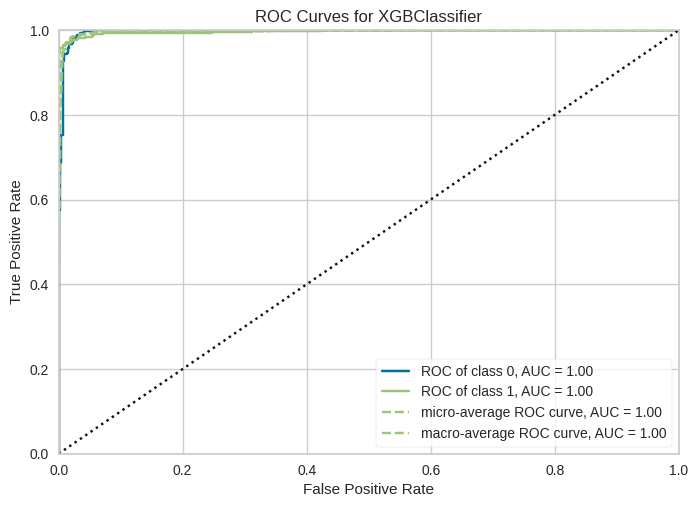

In [ ]:
plot_model(tuned_xgboost, plot = 'auc')



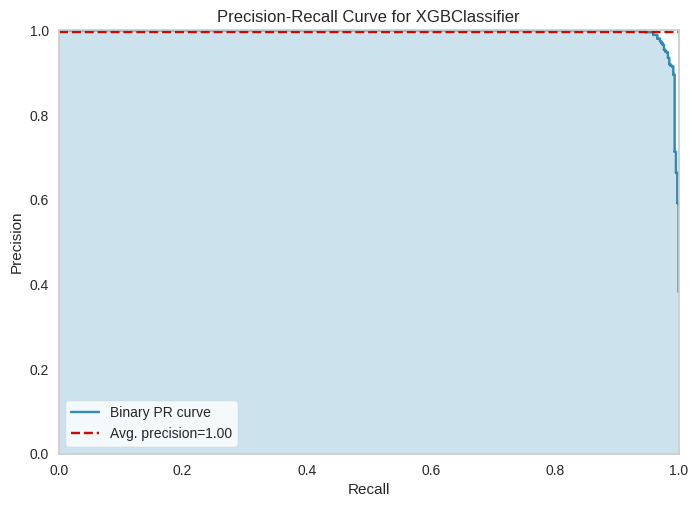

In [ ]:
plot_model(tuned_xgboost, plot = 'pr')

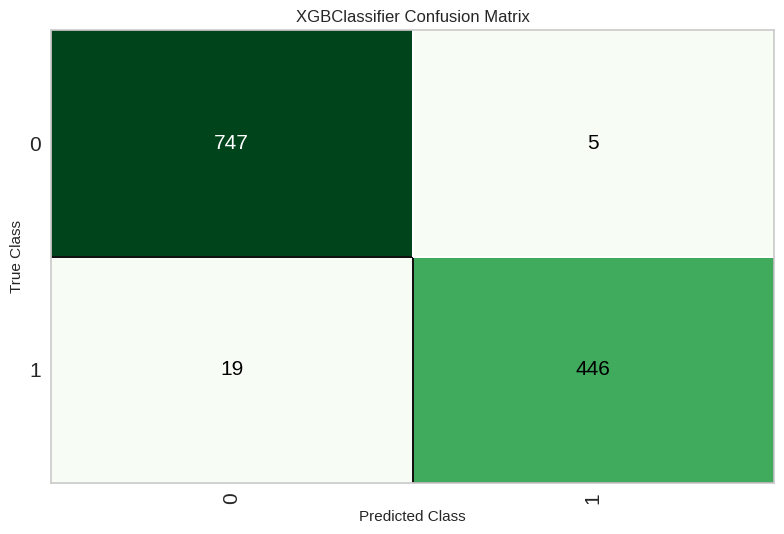

In [ ]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')


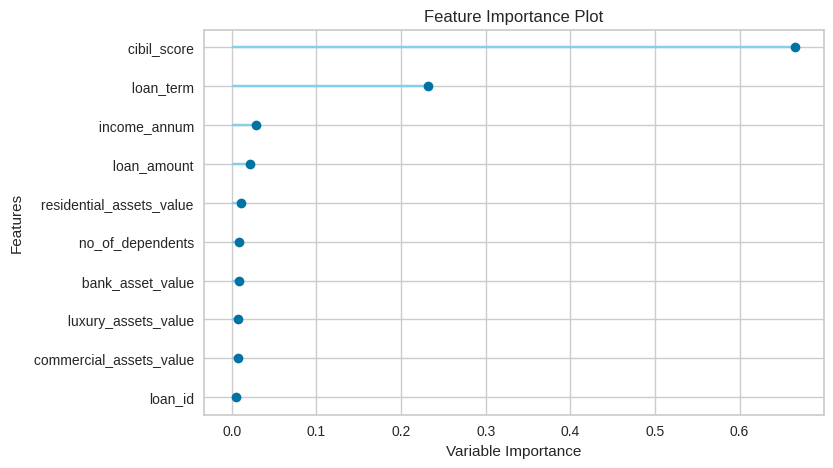

In [ ]:
plot_model(tuned_xgboost, plot = 'feature')

In [ ]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **11. Predict Model**

In [ ]:
predict_model(tuned_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9803,0.9968,0.9591,0.9889,0.9738,0.9580,0.9583


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,prediction_label,prediction_score
3556,2246,4,Graduate,Yes,2500000,9000000,10,394,6700000,2000000,7300000,3000000,1,Rejected,0.9998
4046,1689,4,Graduate,No,6300000,17600000,6,612,16000000,3300000,23500000,3200000,0,Approved,0.9999
1156,948,1,Not Graduate,No,2300000,6600000,18,513,4600000,900000,9000000,1600000,1,Rejected,0.9999
3309,744,5,Graduate,Yes,5800000,16600000,18,376,2500000,7500000,21100000,2800000,1,Rejected,0.9997
346,3683,2,Not Graduate,No,9300000,32300000,4,586,14300000,6400000,37000000,10400000,0,Approved,0.9997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1879,1,Graduate,No,2600000,9900000,6,594,2900000,4300000,6700000,2500000,0,Approved,0.9998
185,1836,2,Not Graduate,No,4300000,11800000,20,701,11600000,4600000,14200000,3300000,0,Approved,0.9999
1495,1574,2,Not Graduate,Yes,2700000,9400000,14,701,400000,3400000,9900000,1900000,0,Approved,0.9997
2256,2073,0,Graduate,No,300000,500000,2,885,200000,400000,700000,200000,0,Approved,0.9983


# **12. Finalize Model**

In [ ]:
final_xgboost = finalize_model(tuned_xgboost)

print(final_xgboost)


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['loan_id', ' no_of_dependents',
                                             ' income_annum', ' loan_amount',
                                             ' loan_term', ' cibil_score',
                                             ' residential_assets_value',
                                             ' commercial_assets...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
      

In [ ]:
predict_model(final_xgboost)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,prediction_label,prediction_score
3556,2246,4,Graduate,Yes,2500000,9000000,10,394,6700000,2000000,7300000,3000000,1,Rejected,0.9995
4046,1689,4,Graduate,No,6300000,17600000,6,612,16000000,3300000,23500000,3200000,0,Approved,1.0000
1156,948,1,Not Graduate,No,2300000,6600000,18,513,4600000,900000,9000000,1600000,1,Rejected,0.9999
3309,744,5,Graduate,Yes,5800000,16600000,18,376,2500000,7500000,21100000,2800000,1,Rejected,0.9997
346,3683,2,Not Graduate,No,9300000,32300000,4,586,14300000,6400000,37000000,10400000,0,Approved,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1879,1,Graduate,No,2600000,9900000,6,594,2900000,4300000,6700000,2500000,0,Approved,1.0000
185,1836,2,Not Graduate,No,4300000,11800000,20,701,11600000,4600000,14200000,3300000,0,Approved,1.0000
1495,1574,2,Not Graduate,Yes,2700000,9400000,14,701,400000,3400000,9900000,1900000,0,Approved,0.9997
2256,2073,0,Graduate,No,300000,500000,2,885,200000,400000,700000,200000,0,Approved,0.9979


# **13. Predict on Unseen data**

In [ ]:
unseen_predictions = predict_model(final_xgboost, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,prediction_label,prediction_score
0,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1,Rejected,0.9998
1,14,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,0,Approved,0.9998
2,19,2,Graduate,No,2700000,10300000,10,736,1000000,0,6200000,3300000,0,Approved,0.9034
3,32,2,Graduate,No,5700000,12000000,6,363,3600000,7400000,21700000,4300000,1,Rejected,0.9999
4,58,5,Graduate,Yes,9300000,30500000,18,841,19300000,10300000,34600000,8700000,0,Approved,0.9999


# **14. Saving the model**

In [ ]:
save_model(final_xgboost,'Final XGBOOST Model Version 1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['loan_id', ' no_of_dependents',
                                              ' income_annum', ' loan_amount',
                                              ' loan_term', ' cibil_score',
                                              ' residential_assets_value',
                                              ' commercial_assets...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_st

# **15. Load the saved model (for future use)**

In [ ]:
saved_final_xgboost = load_model('Final XGBOOST Model Version 1')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_xgboost, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
new_prediction.head(50)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,prediction_label,prediction_score
0,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1,Rejected,0.9998
1,14,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,0,Approved,0.9998
2,19,2,Graduate,No,2700000,10300000,10,736,1000000,0,6200000,3300000,0,Approved,0.9034
3,32,2,Graduate,No,5700000,12000000,6,363,3600000,7400000,21700000,4300000,1,Rejected,0.9999
4,58,5,Graduate,Yes,9300000,30500000,18,841,19300000,10300000,34600000,8700000,0,Approved,0.9999
5,72,5,Graduate,Yes,5300000,18600000,4,386,2700000,9700000,11900000,4200000,0,Approved,0.9684
6,84,3,Graduate,No,3600000,8600000,20,613,9400000,300000,10300000,3300000,0,Approved,0.9999
7,87,5,Not Graduate,Yes,1100000,3800000,18,387,1300000,1200000,3800000,1600000,1,Rejected,0.9991
8,98,2,Not Graduate,No,8700000,25000000,20,861,14700000,8500000,23200000,7300000,0,Approved,0.9998
9,104,4,Graduate,No,1600000,4500000,12,633,700000,1700000,4100000,1900000,0,Approved,0.9988
